<div align='center'>
<h1 style='font-size:38px;'>Computing Thermal & Scattered Fluxes</h1>
<h2 style='font-weight:400;'>Using <code>Fluxes</code> and <code>Fluxes_optimized</code></h2>
<p><em>Size integration, wavelength loops, and performance comparison</em></p>
</div>

---
**Contents:**
1. Imports + objects
2. Instantiate Fluxes classes
3. Compute scattered flux
4. Compute thermal flux
5. Plot radial dependence per wavelength
6. Fit power-law slopes
7. Compare optimized vs original timing
8. Notes

## 1. Imports and setup

In [2]:
from pyGrater import stargrains as stgr
from pyGrater.radiative_transfer import Fluxes, Fluxes_optimized
from pyGrater.size_distributions import power_law_distribution
import numpy as np
import matplotlib.pyplot as plt
import time

## 2. Grain, Star, and wavelength grid

In [3]:
grain = stgr.Grain(redo_Q=False)
star = stgr.Star('bPic')
wavelengths_for_calc = np.array([0.55, 1.65, 10.257, 60.0, 160.0, 850.0])  # microns
print('Wavelengths:', wavelengths_for_calc)

General parameters file: /Users/prioletp/PhD/public_codes/pyGrater/pyGrater/parameters/general.yaml
General parameters loaded:
{ 'N_sizes': 2000,
  'N_waves': 2000,
  'N_waves_undersampled': 300,
  'composition': 'aC_ACAR',
  'print_information': True,
  'size_max': 5000,
  'size_min': 0.01,
  'star_name': 'BPic',
  'waves_max': 1500,
  'waves_min': 0.05}
Grain properties:
{ 'Class': 'Native Elements',
  'Density': 1.95,
  'File_par': 'aC_ACAR.txt',
  'File_per1': 'aC_ACAR.txt',
  'File_per2': 'aC_ACAR.txt',
  'Formula': 'C',
  'Full_Name': 'amorphous Carbon, ACAR sample from Zubko et al. 96',
  'Group': 'Carbon',
  'Nickname': 'aC_ACAR',
  'Reference': 'Zubko V. et al 1996, MNRAS, 282, 1321-1329',
  'Subclass': 'non-metals',
  'Tsub': 2000.0,
  'Wav_max': 1984.0,
  'Wav_min': 0.04008,
  'Web': '',
  'Weight_par': 0.333333,
  'Weight_per1': 0.333333,
  'Weight_per2': 0.333333}
aC_ACAR optical tables already exist :
--> Wavelenghts : 2000 values from 5.0e-02 to 1.5e+03 microns
--> Sizes

## 3. Instantiate both Fluxes implementations

In [4]:
flux_obj = Fluxes(grain, star, wavelengths_for_calc, power_law_distribution)
flux_obj_opt = Fluxes_optimized(grain, star, wavelengths_for_calc, power_law_distribution)

Loading the thermal distance array from file...
The thermal distances go from 0.059958695533369445 to 6026347.79848734 au
The maximum distance for the temperature calculation is: 6026347.79848734
(2000, 300) (300,)
3.0 2000.0
0.059958695533369445 50.0
Loading the thermal distance array from file...
The thermal distances go from 0.059958695533369445 to 6026347.79848734 au
The maximum distance for the temperature calculation is: 6026347.79848734
(2000, 300) (300,)
3.0 2000.0
0.059958695533369445 50.0
Loading the thermal distance array from file...
The thermal distances go from 0.059958695533369445 to 6026347.79848734 au
The maximum distance for the temperature calculation is: 6026347.79848734
(2000, 300) (300,)
3.0 2000.0
0.059958695533369445 50.0


## 4. Define integration parameters

In [10]:
params = dict(a_min=0.01e-6, a_max=3000e-6, kappa=3.5, N_sizes_integral=300)
print(params)

{'a_min': 1e-08, 'a_max': 0.003, 'kappa': 3.5, 'N_sizes_integral': 300}


## 5. Compute scattered flux (original vs optimized)

In [11]:
t0 = time.time()
flux_scattered = flux_obj.scattered_flux(**params)
t_orig_sc = time.time()-t0
t0 = time.time()
flux_scattered_opt = flux_obj_opt.scattered_flux(**params)
t_opt_sc = time.time()-t0
print(f'Original scattered time: {t_orig_sc:.2f}s | Optimized: {t_opt_sc:.2f}s')

These are the kwargs for the thermal_flux function: {'a_min': 1e-08, 'a_max': 0.003, 'kappa': 3.5, 'N_sizes_integral': 300}
Calculating: 16.666666666666668 %
Here is the shape of the flux temp: (400,)
Here is the shape of distances for flux: (400,)
Calculating: 33.333333333333336 %
Here is the shape of the flux temp: (400,)
Here is the shape of distances for flux: (400,)
Calculating: 50.0 %
Here is the shape of the flux temp: (400,)
Here is the shape of distances for flux: (400,)
Calculating: 33.333333333333336 %
Here is the shape of the flux temp: (400,)
Here is the shape of distances for flux: (400,)
Calculating: 50.0 %
Here is the shape of the flux temp: (400,)
Here is the shape of distances for flux: (400,)
Calculating: 66.66666666666667 %
Here is the shape of the flux temp: (400,)
Here is the shape of distances for flux: (400,)
Calculating: 83.33333333333333 %
Here is the shape of the flux temp: (400,)
Here is the shape of distances for flux: (400,)
Calculating: 66.66666666666667 

Scattered flux: 100%|██████████| 6/6 [00:00<00:00, 903.75it/s]

Original scattered time: 1.14s | Optimized: 0.01s


## 6. Compute thermal flux (original vs optimized)

In [12]:
t0 = time.time()
flux_thermal = flux_obj.thermal_flux(**params)
t_orig_th = time.time()-t0
t0 = time.time()
flux_thermal_opt = flux_obj_opt.thermal_flux(**params)
t_opt_th = time.time()-t0
print(f'Original thermal time: {t_orig_th:.2f}s | Optimized: {t_opt_th:.2f}s')

These are the kwargs for the thermal_flux function: {'a_min': 1e-08, 'a_max': 0.003, 'kappa': 3.5, 'N_sizes_integral': 300}
Calculating for wavelength: 0.55
Time to calculate integral: 0.00 seconds.
Calculating: 0.041666666666666664 %
Time to calculate integral: 0.00 seconds.
Calculating: 0.08333333333333333 %
Time to calculate integral: 0.00 seconds.
Calculating: 0.125 %
Time to calculate integral: 0.00 seconds.
Calculating: 0.16666666666666666 %
Time to calculate integral: 0.00 seconds.
Calculating: 0.20833333333333334 %
Time to calculate integral: 0.00 seconds.
Calculating: 0.25 %
Time to calculate integral: 0.00 seconds.
Calculating: 0.2916666666666667 %
Time to calculate integral: 0.00 seconds.
Calculating: 0.3333333333333333 %
Time to calculate integral: 0.00 seconds.
Calculating: 0.375 %
Time to calculate integral: 0.00 seconds.
Calculating: 0.4166666666666667 %
Time to calculate integral: 0.00 seconds.
Calculating: 0.4583333333333333 %
Time to calculate integral: 0.00 seconds.


Thermal flux: 100%|██████████| 6/6 [00:00<00:00, 343.07it/s]

Original thermal time: 1.41s | Optimized: 0.02s


## 7. Plot radial dependence for each wavelength (optimized)

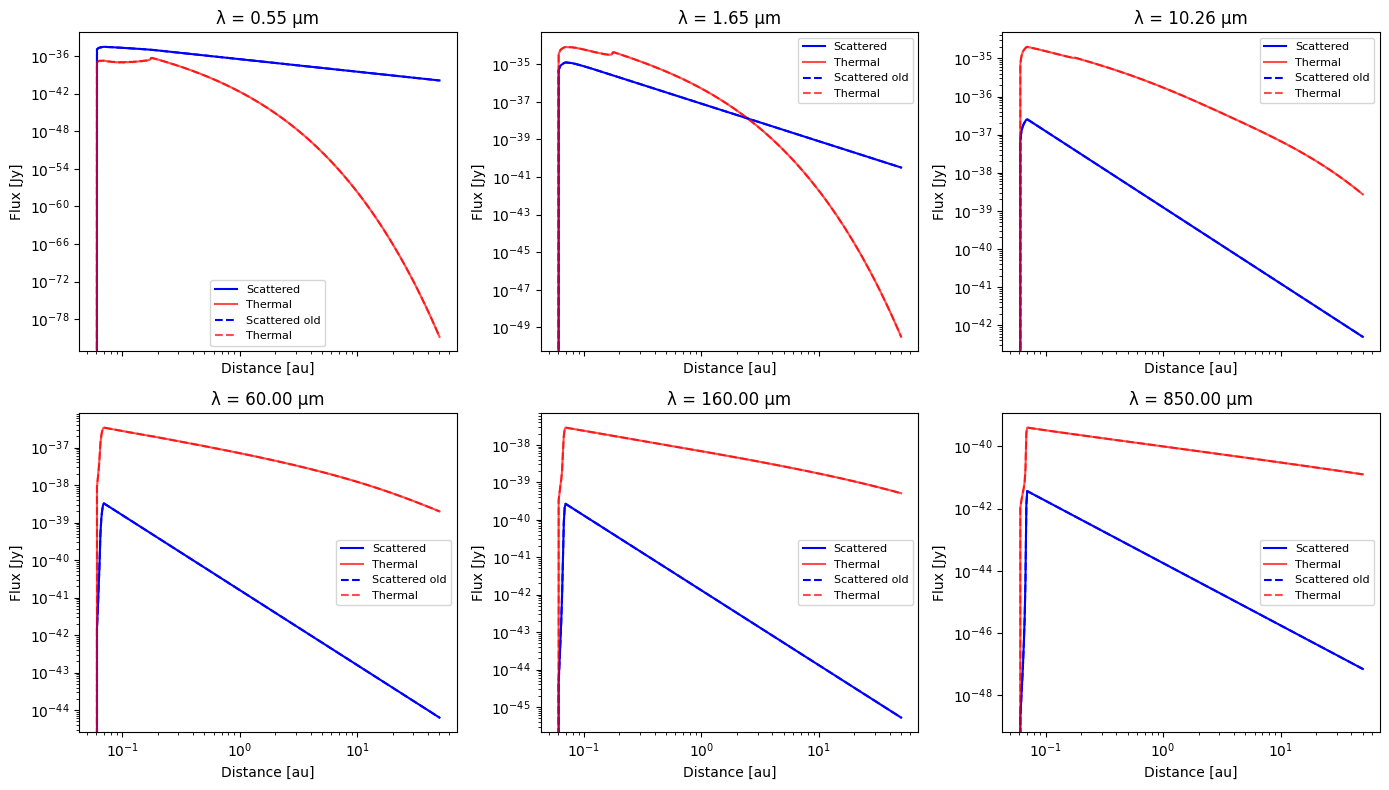

In [21]:
dist = flux_obj_opt.distances_for_flux
colors = plt.cm.viridis(np.linspace(0,1,len(wavelengths_for_calc)))
fig, axes = plt.subplots(2,3, figsize=(14,8), sharex=True)
axes = axes.flatten()
for i, wl in enumerate(wavelengths_for_calc):
    ax = axes[i]
    ax.loglog(dist, flux_scattered_opt[i], c='blue', label=f'Scattered')
    ax.loglog(dist, flux_thermal_opt[i], c='red', alpha=0.7, label='Thermal')
    ax.loglog(dist, flux_scattered[i], c='blue', label=f'Scattered old', linestyle='--')
    ax.loglog(dist, flux_thermal[i], c='red', alpha=0.7, label='Thermal',linestyle='--')
    ax.set_title(f'λ = {wl:.2f} µm')
    ax.set_xlabel('Distance [au]')
    ax.set_ylabel('Flux [Jy]')
    ax.legend(fontsize=8)
for j in range(len(wavelengths_for_calc), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()

/var/folders/vs/k0m4c79s4_qg6268tmw496b40000gp/T/ipykernel_17777/865942047.py:7: RuntimeWarning: invalid value encountered in divide
  diff_therm = np.abs(flux_thermal_opt[i]-flux_thermal[i])/flux_thermal[i]
/var/folders/vs/k0m4c79s4_qg6268tmw496b40000gp/T/ipykernel_17777/865942047.py:8: RuntimeWarning: invalid value encountered in divide
  diff_scatt = np.abs(flux_scattered_opt[i]-flux_scattered[i])/flux_scattered[i]


Wavelength 0.55 µm: Max thermal diff = nan, Max scattered diff = nan
Wavelength 1.65 µm: Max thermal diff = nan, Max scattered diff = nan
Wavelength 10.26 µm: Max thermal diff = nan, Max scattered diff = nan
Wavelength 60.00 µm: Max thermal diff = nan, Max scattered diff = nan
Wavelength 160.00 µm: Max thermal diff = nan, Max scattered diff = nan
Wavelength 850.00 µm: Max thermal diff = nan, Max scattered diff = nan


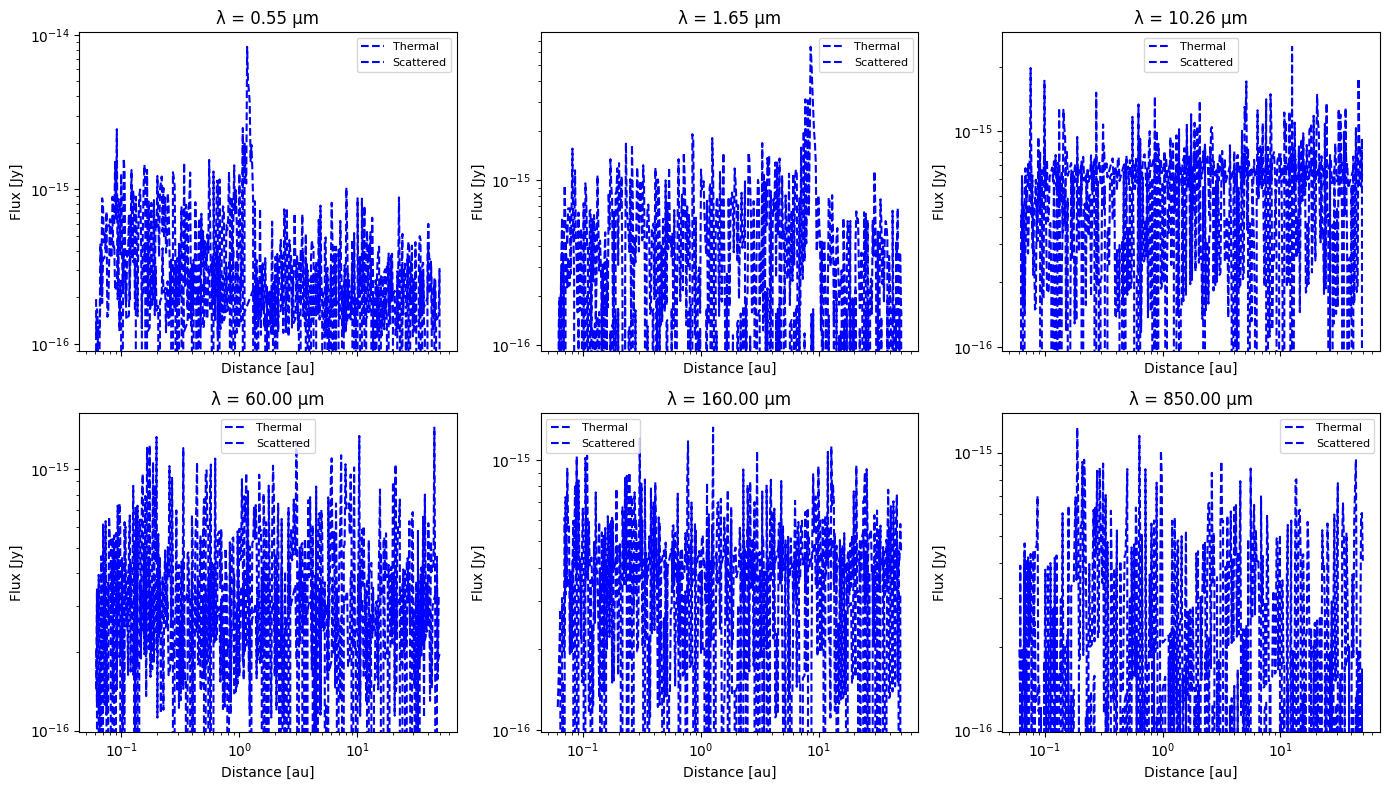

In [19]:
dist = flux_obj_opt.distances_for_flux
colors = plt.cm.viridis(np.linspace(0,1,len(wavelengths_for_calc)))
fig, axes = plt.subplots(2,3, figsize=(14,8), sharex=True)
axes = axes.flatten()
for i, wl in enumerate(wavelengths_for_calc):
    ax = axes[i]
    diff_therm = np.abs(flux_thermal_opt[i]-flux_thermal[i])/flux_thermal[i]
    diff_scatt = np.abs(flux_scattered_opt[i]-flux_scattered[i])/flux_scattered[i]  
    print(f'Wavelength {wl:.2f} µm: Max thermal diff = {np.max(diff_therm):.3e}, Max scattered diff = {np.max(diff_scatt):.3e}')
    ax.loglog(dist, diff_therm, c='blue', label=f'Thermal', linestyle='--')
    ax.loglog(dist, diff_scatt, c='blue', label=f'Scattered', linestyle='--')

    ax.set_title(f'λ = {wl:.2f} µm')
    ax.set_xlabel('Distance [au]')
    ax.set_ylabel('Flux [Jy]')
    ax.legend(fontsize=8)
for j in range(len(wavelengths_for_calc), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()

## 8. Power-law slope fitting (flux ∝ r^p)

In [14]:
def fit_power_law(r, f):
    mask = r > 0.1
    log_r = np.log10(r[mask])
    log_f = np.log10(f[mask])
    return np.polyfit(log_r, log_f, 1)[0]
slopes_sc = []
slopes_th = []
for i in range(len(wavelengths_for_calc)):
    slopes_sc.append(fit_power_law(dist, flux_scattered_opt[i]))
    slopes_th.append(fit_power_law(dist, flux_thermal_opt[i]))
for wl, ps, pt in zip(wavelengths_for_calc, slopes_sc, slopes_th):
    print(f'λ={wl:.2f}µm  scattered p={ps:.2f}  thermal p={pt:.2f}')

λ=0.55µm  scattered p=-1.98  thermal p=-15.37
λ=1.65µm  scattered p=-2.00  thermal p=-5.27
λ=10.26µm  scattered p=-2.00  thermal p=-1.37
λ=60.00µm  scattered p=-2.00  thermal p=-0.76
λ=160.00µm  scattered p=-2.00  thermal p=-0.60
λ=850.00µm  scattered p=-2.00  thermal p=-0.52


## 9. Timing summary

In [ ]:
print(f'Scattered speedup: {t_orig_sc/t_opt_sc:.2f}x')
print(f'Thermal speedup:   {t_orig_th/t_opt_th:.2f}x')

## 10. Notes
- Integration uses trapezoid over grain size distribution.
- Thermal flux multiplies Planck emission, absorption efficiency, size distribution, geometry.
- Scattered flux multiplies πa² Q_sca and stellar illumination (∝ 1/r²).
- Optimized class vectorizes wavelength loops and caches temperatures.
- Adjust resolution via `N_sizes_integral`, wavelength list, or thermal grid `N_temp` in `GrainStar`.